In [3]:
import pandas as pd
data = pd.read_csv("loan_data.csv")

In [4]:
print(data.head())

   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None


In [7]:
X = data[['Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account']]


In [9]:
print(data.columns.tolist())

['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


In [11]:
y = data['Personal Loan']

In [10]:
if 'Approval_Status' in data.columns:
    y = data['Approval_Status']
else:
    print("Column 'Approval_Status' not found!")

Column 'Approval_Status' not found!


In [12]:
print(data.isnull().sum())

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


In [13]:
X.fillna(0, inplace=True)

<ipython-input-13-67b4599ed24c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (4000, 8)
Testing data shape: (1000, 8)


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)

dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

normal=accuracy_score(y_test, y_pred)

print("Decision Tree Accuracy:", normal)


Decision Tree Accuracy: 0.984


In [17]:
%pip install scikit-learn-intelex


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.4/91.4 MB 5.4 MB/s eta 0:00:00


In [18]:
from sklearnex import patch_sklearn
patch_sklearn()

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [19]:

dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)


dt_model.fit(X_train, y_train)


y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy)


Decision Tree Accuracy: 0.984


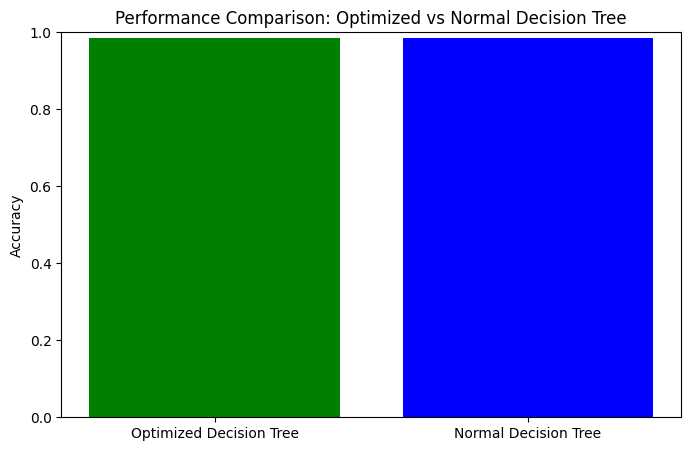

In [21]:
import matplotlib.pyplot as plt

models = ['Optimized Decision Tree', 'Normal Decision Tree']
accuracies = [accuracy ,normal]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['green', 'blue'])

plt.ylabel('Accuracy')
plt.title('Performance Comparison: Optimized vs Normal Decision Tree')
plt.ylim(0, 1)

plt.show()


In [22]:
%pip install gradio
import gradio as gr
from sklearnex import patch_sklearn
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score
import pandas as pd


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.6 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [23]:

patch_sklearn()


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [24]:
import numpy as np
import gradio as gr

def predict_loan_approval(experience, income, family, ccavg, education, mortgage, sec_acc, cd_acc):

    input_data = np.array([[experience, income, family, ccavg, education, mortgage, sec_acc, cd_acc]])

    prediction = dt_model.predict(input_data)

    return "Approved" if prediction == 1 else "Not Approved"


In [26]:
interface = gr.Interface(
    fn=predict_loan_approval,
    inputs=[
        gr.Number(label="Experience (years)", value=5),  # Experience input
        gr.Number(label="Income (thousand dollars)", value=70),  # Income input
        gr.Number(label="Family Size", value=3),  # Family input
        gr.Number(label="Avg. Spending on Credit Cards (thousand dollars)", value=2.5),  # Credit card avg input
        gr.Dropdown(choices=[1, 2, 3], label="Education Level", value=2),  # Education dropdown (1: Undergrad, 2: Graduate, 3: Advanced/Professional)
        gr.Number(label="Mortgage (thousand dollars)", value=100),  # Mortgage input
        gr.Checkbox(label="Securities Account", value=False),  # Securities account checkbox
        gr.Checkbox(label="CD Account", value=False)  # CD account checkbox
    ],
    outputs="text",  # Output as text (either "Approved" or "Not Approved")
    title="Loan Approval Prediction",
    description="Enter the customer's details to predict if the loan will be approved or not."
)

# Launch the Gradio interface
interface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://19bb19dcdb84cf5bd8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
